<a name='toc'></a>
### Table of Contents

[1. Imports](#imports)

<a name='imports'></a>
### imports

In [1]:
# imports
import requests
import json
import pandas as pd
import urllib3
import certifi
from urllib3 import request
http = urllib3.PoolManager(
       cert_reqs='CERT_REQUIRED',
       ca_certs=certifi.where())

In [4]:
#url = "https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json"
starting_url = 'https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json?limit=10000&offset=1&_=1625851370881'
starting_url

'https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json?limit=10000&offset=1&_=1625851370881'

In [5]:
response = http.request('GET', starting_url)
data = json.loads(response.data.decode('utf-8'))
df = pd.json_normalize(data, record_path=['compound_structural_alerts'])
url_df = pd.json_normalize(data)
base = 'https://www.ebi.ac.uk'

next_url_exist = url_df['page_meta.next'][0]
print("Starting URL", starting_url)

while(next_url_exist):
    
    next_url = base + str(next_url_exist)
    response = http.request('GET', next_url)
    data = json.loads(response.data.decode('utf-8'))
    df_next = pd.json_normalize(data, record_path=['compound_structural_alerts'])
    next_url_df = pd.json_normalize(data)
    next_url_exist = next_url_df['page_meta.next'][0]
    df = df.append(df_next)
    print("shape of new df: ", df.shape)
    print ("Will use this url next: ", next_url)
    




Starting URL https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json?limit=10000&offset=1&_=1625851370881
shape of new df:  (2000, 7)
Will use this url next:  https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json?limit=1000&offset=1001&_=1625851370881
shape of new df:  (3000, 7)
Will use this url next:  https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json?limit=1000&offset=2001&_=1625851370881
shape of new df:  (4000, 7)
Will use this url next:  https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json?limit=1000&offset=3001&_=1625851370881
shape of new df:  (5000, 7)
Will use this url next:  https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json?limit=1000&offset=4001&_=1625851370881
shape of new df:  (6000, 7)
Will use this url next:  https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json?limit=1000&offset=5001&_=1625851370881
shape of new df:  (7000, 7)
Will use this url next:  https://www.ebi.ac.uk/c

KeyboardInterrupt: 

In [ ]:
df

In [ ]:
df.info()
df.to_csv('chembl_structural_alerts.csv', sep=',', header=1)

In [6]:
df = pd.read_csv('chembl_structural_alerts.csv')
df

,Unnamed: 0,cpd_str_alert_id,molecule_chembl_id,alert.alert_id,alert.alert_name,alert.alert_set.priority,alert.alert_set.set_name,alert.smarts
0,0,45611902,CHEMBL6343,1,R1 Reactive alkyl halides,8,Glaxo,"[Br,Cl,I][CX4;CH,CH2]"
1,1,45611903,CHEMBL428313,1,R1 Reactive alkyl halides,8,Glaxo,"[Br,Cl,I][CX4;CH,CH2]"
2,2,45611904,CHEMBL268176,1,R1 Reactive alkyl halides,8,Glaxo,"[Br,Cl,I][CX4;CH,CH2]"
3,3,45611905,CHEMBL6679,1,R1 Reactive alkyl halides,8,Glaxo,"[Br,Cl,I][CX4;CH,CH2]"
4,4,45611906,CHEMBL266544,1,R1 Reactive alkyl halides,8,Glaxo,"[Br,Cl,I][CX4;CH,CH2]"
...,...,...,...,...,...,...,...,...
3692279,279,49304601,CHEMBL4552911,63,Aliphatic long chain,4,Dundee,[R0;D2][R0;D2][R0;D2][R0;D2]
3692280,280,49304602,CHEMBL4552911,1040,Long aliphatic chain,3,MLSMR,"[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]!@[N..."
3692281,281,49304603,CHEMBL4526291,47,I16 Betalactams,8,Glaxo,N1CCC1=O
3692282,282,49304604,CHEMBL4526291,213,betalactam,7,BMS,C1(=O)~[#6]~[#6]N1


In [7]:
df.nunique()

Unnamed: 0                     1000
cpd_str_alert_id            3692283
molecule_chembl_id          1203167
alert.alert_id                  516
alert.alert_name                474
alert.alert_set.priority          5
alert.alert_set.set_name          5
alert.smarts                    458
dtype: int64

In [8]:
df.value_counts()

Unnamed: 0  cpd_str_alert_id  molecule_chembl_id  alert.alert_id  alert.alert_name           alert.alert_set.priority  alert.alert_set.set_name  alert.smarts                                                               
999         45621901          CHEMBL2270206       1               R1 Reactive alkyl halides  8                         Glaxo                     [Br,Cl,I][CX4;CH,CH2]                                                          2
0           45611902          CHEMBL6343          1               R1 Reactive alkyl halides  8                         Glaxo                     [Br,Cl,I][CX4;CH,CH2]                                                          1
666         47996796          CHEMBL109811        1040            Long aliphatic chain       3                         MLSMR                     [N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]    1
            47971792          CHEMBL53584         1040            Long aliphatic chain       3       

In [9]:
df['cpd_str_alert_id'].groupby(df['alert.alert_set.set_name']).describe()

,count,mean,std,min,25%,50%,75%,max
alert.alert_set.set_name,,,,,,,,
BMS,262562.0,4.734496e+07,548847.815233,47063249.0,47128902.25,47194562.5,47260210.75,49304604.0
Dundee,1379051.0,4.661062e+07,785513.930443,45778665.0,46123448.50,46468244.0,46813023.50,49304601.0
Glaxo,180869.0,4.596786e+07,938004.951239,45611902.0,45657119.00,45702340.0,45747562.00,49304603.0
MLSMR,1810127.0,4.826974e+07,529110.813278,47360832.0,47813418.50,48265984.0,48718543.50,49304605.0
PAINS,59675.0,4.744460e+07,442091.754382,47304750.0,47319668.50,47334588.0,47349507.50,49304479.0


In [10]:
df_pains = df[df["alert.alert_set.set_name"] == 'PAINS']
df_pains

,Unnamed: 0,cpd_str_alert_id,molecule_chembl_id,alert.alert_id,alert.alert_name,alert.alert_set.priority,alert.alert_set.set_name,alert.smarts
1692698,698,47304750,CHEMBL6608,345,quinone_A(370),6,PAINS,"[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]..."
1692699,699,47304751,CHEMBL268413,345,quinone_A(370),6,PAINS,"[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]..."
1692700,700,47304752,CHEMBL417,345,quinone_A(370),6,PAINS,"[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]..."
1692701,701,47304753,CHEMBL216758,345,quinone_A(370),6,PAINS,"[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]..."
1692702,702,47304754,CHEMBL269021,345,quinone_A(370),6,PAINS,"[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]..."
...,...,...,...,...,...,...,...,...
3691872,872,49304194,CHEMBL1200827,382,anthranil_one_A(38),6,PAINS,"c:1:c:c:c:c(:c:1-[#7&!H0;!H1,!$([#7]-[#6]=[#8]..."
3692051,51,49304373,CHEMBL4557710,346,azo_A(324),6,PAINS,[#7;!R]=[#7]
3692063,63,49304385,CHEMBL4592391,372,amino_acridine_A(46),6,PAINS,c:1:c:2:c(:c:c:c:1):n:c:3:c(:c:2-[#7]):c:c:c:c:3
3692093,93,49304415,CHEMBL4463982,346,azo_A(324),6,PAINS,[#7;!R]=[#7]


<AxesSubplot:xlabel='alert.alert_name'>

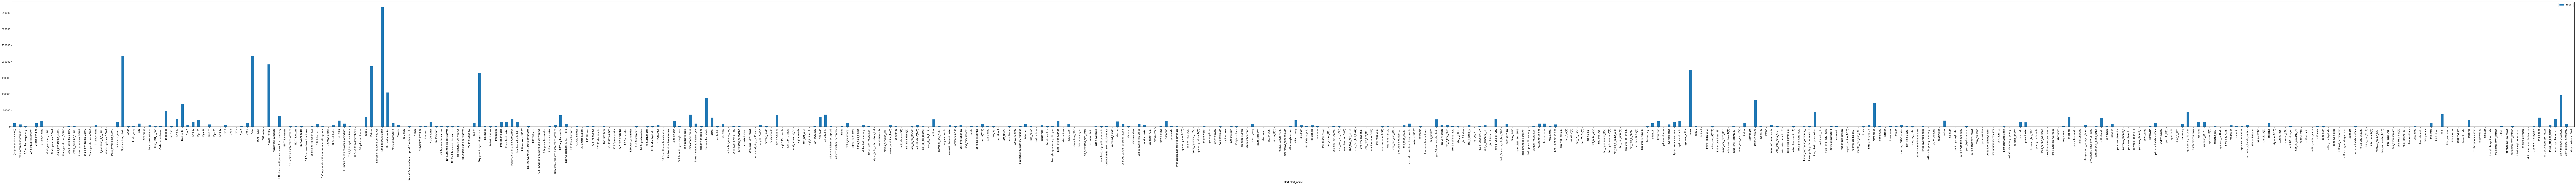

In [11]:
df['cpd_str_alert_id'].groupby(df['alert.alert_name']).describe().plot(y=['count'],kind='bar', figsize=(200,10))

In [12]:
df['alert.alert_set.set_name'].unique()

array(['Glaxo', 'Dundee', 'BMS', 'PAINS', 'MLSMR'], dtype=object)

In [13]:
PAINS = df['alert.alert_set.set_name'] = 'PAINS'

In [14]:
df_pains = df[df['alert.alert_set.set_name'].str.contains('PAINS')]

In [31]:
df_pains = pd.read_csv('chembl_PAINS.csv')
df_pains

,Unnamed: 0,Unnamed: 0.1,cpd_str_alert_id,molecule_chembl_id,alert.alert_id,alert.alert_name,alert.alert_set.priority,alert.alert_set.set_name,alert.smarts
0,1692698,698,47304750,CHEMBL6608,345,quinone_A(370),6,PAINS,"[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]..."
1,1692699,699,47304751,CHEMBL268413,345,quinone_A(370),6,PAINS,"[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]..."
2,1692700,700,47304752,CHEMBL417,345,quinone_A(370),6,PAINS,"[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]..."
3,1692701,701,47304753,CHEMBL216758,345,quinone_A(370),6,PAINS,"[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]..."
4,1692702,702,47304754,CHEMBL269021,345,quinone_A(370),6,PAINS,"[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]..."
...,...,...,...,...,...,...,...,...,...
59670,3691872,872,49304194,CHEMBL1200827,382,anthranil_one_A(38),6,PAINS,"c:1:c:c:c:c(:c:1-[#7&!H0;!H1,!$([#7]-[#6]=[#8]..."
59671,3692051,51,49304373,CHEMBL4557710,346,azo_A(324),6,PAINS,[#7;!R]=[#7]
59672,3692063,63,49304385,CHEMBL4592391,372,amino_acridine_A(46),6,PAINS,c:1:c:2:c(:c:c:c:1):n:c:3:c(:c:2-[#7]):c:c:c:c:3
59673,3692093,93,49304415,CHEMBL4463982,346,azo_A(324),6,PAINS,[#7;!R]=[#7]


In [30]:
df_pains = pd.read_csv('chembl_PAINS.csv')

In [ ]:
data = json.loads(response.data.decode('utf-8'))
data

In [ ]:
print(json.dumps(parsed, indent=4))

In [ ]:
df = pd.json_normalize(data)
#df.head(10)

In [ ]:
base = 'https://www.ebi.ac.uk'
url = base + str(df['page_meta.next'][0])
url
    

In [ ]:
response = http.request('GET', url)

In [ ]:
response.status

In [ ]:
data = json.loads(response.data.decode('utf-8'))

In [ ]:
df_

<a name='activity'></a>
### Parse ChEMBL activity

In [20]:
starting_activity_url = '/chembl/api/data/activity.json?limit=1000&offset=1'
base = 'https://www.ebi.ac.uk'
starting_activity_url = base + starting_activity_url
starting_activity_url

'https://www.ebi.ac.uk/chembl/api/data/activity.json?limit=10000&offset=1'

In [21]:
response = http.request('GET', starting_activity_url)
data = json.loads(response.data.decode('utf-8'))


In [22]:
print(response.status)

200


In [27]:
df = pd.json_normalize(data, record_path='activities')

In [28]:
data

{'activities': [{'activity_comment': None,
   'activity_id': 31864,
   'activity_properties': [],
   'assay_chembl_id': 'CHEMBL872937',
   'assay_description': 'In vivo inhibitory activity against human Heparanase',
   'assay_type': 'B',
   'assay_variant_accession': None,
   'assay_variant_mutation': None,
   'bao_endpoint': 'BAO_0000190',
   'bao_format': 'BAO_0000218',
   'bao_label': 'organism-based format',
   'canonical_smiles': 'Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)c3)nc2c1',
   'data_validity_comment': None,
   'data_validity_description': None,
   'document_chembl_id': 'CHEMBL1146658',
   'document_journal': 'Bioorg. Med. Chem. Lett.',
   'document_year': 2004,
   'ligand_efficiency': {'bei': '14.06',
    'le': '0.26',
    'lle': '1.30',
    'sei': '5.56'},
   'molecule_chembl_id': 'CHEMBL324340',
   'molecule_pref_name': None,
   'parent_molecule_chembl_id': 'CHEMBL324340',
   'pchembl_value': '5.60',
   'potential_duplicate': True,
   'qudt_units': 'http://www.openp

In [29]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,type,units,uo_units,upper_value,value,ligand_efficiency.bei,ligand_efficiency.le,ligand_efficiency.lle,ligand_efficiency.sei,ligand_efficiency
0,None,31864,[],CHEMBL872937,In vivo inhibitory activity against human Hepa...,B,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,UO_0000065,None,2.5,14.06,0.26,1.30,5.56,NaN
1,None,31865,[],CHEMBL693237,In vivo concentration required against angioge...,F,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,UO_0000065,None,50.0,NaN,NaN,NaN,NaN,NaN
2,None,31866,[],CHEMBL872937,In vivo inhibitory activity against human Hepa...,B,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,UO_0000065,None,9.0,9.69,0.18,-0.63,4.23,NaN
3,Not Determined,31867,[],CHEMBL693238,In vivo concentration required against angioge...,F,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,None,None,None,NaN,NaN,NaN,NaN,NaN
4,None,31868,[],CHEMBL760688,Inhibitory activity against Palmitoyl-CoA oxid...,B,None,None,BAO_0000190,BAO_0000357,...,IC50,uM,UO_0000065,None,4.0,9.94,0.20,1.13,6.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,inactive at 100 uM and 1000 uM respectively,32859,[],CHEMBL701521,In vitro ability to inhibit the growth of L121...,F,None,None,BAO_0000375,BAO_0000219,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN
996,inactive at 100 uM and 1000 uM respectively,32860,[],CHEMBL820906,In vitro ability to inhibit the growth of WI-L...,F,None,None,BAO_0000375,BAO_0000019,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN
997,inactive at 100 uM and 1000 uM respectively,32861,[],CHEMBL652481,In vitro ability to inhibit the growth of CCRF...,F,None,None,BAO_0000375,BAO_0000219,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN
998,inactive at 100 uM and 1000 uM respectively,32862,[],CHEMBL695774,In vitro antiviral activity against herpes sim...,F,None,None,BAO_0000375,BAO_0000218,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN


In [32]:
from chembl_webresource_client.new_client import new_client
activities = new_client.activity
res = activities.filter(molecule_chembl_id="CHEMBL25", pchembl_value__isnull=False)

In [35]:
res = pd.json_normalize(res)
res

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,toid,type,units,uo_units,upper_value,value,ligand_efficiency.bei,ligand_efficiency.le,ligand_efficiency.lle,ligand_efficiency.sei
0,None,88326,[],CHEMBL762032,Inhibitory concentration required against Arac...,F,None,None,BAO_0000190,BAO_0000019,...,None,IC50,uM,UO_0000065,None,34.6,NaN,NaN,NaN,NaN
1,None,88327,[],CHEMBL762033,In vitro inhibition of Collagen (10 ug/mL) ind...,F,None,None,BAO_0000190,BAO_0000019,...,None,IC50,uM,UO_0000065,None,34.9,NaN,NaN,NaN,NaN
2,None,91852,[],CHEMBL760085,Inhibitory concentration in DMSO with purified...,B,None,None,BAO_0000190,BAO_0000357,...,None,IC50,uM,UO_0000065,None,62.5,23.34,0.44,2.89,6.61
3,None,91853,[],CHEMBL764258,Inhibitory concentration in DMSO with purified...,B,None,None,BAO_0000190,BAO_0000357,...,None,IC50,uM,UO_0000065,None,12.5,27.22,0.52,3.59,7.71
4,None,392578,[],CHEMBL768981,In vitro antiplatelet activity against arachid...,F,None,None,BAO_0000190,BAO_0000218,...,None,IC50,uM,UO_0000065,None,16.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,None,18790504,[],CHEMBL4272702,Inhibition of LPS-induced PGE2 production in C...,F,None,None,BAO_0000190,BAO_0000019,...,None,IC50,uM,UO_0000065,None,4.08,NaN,NaN,NaN,NaN
134,None,19274293,[],CHEMBL4407501,Inhibition of ovine COX1 using arachidonic aci...,B,None,None,BAO_0000190,BAO_0000357,...,None,IC50,uM,UO_0000065,None,6.12,28.94,0.55,3.90,8.20
135,None,19274301,[],CHEMBL4407502,Inhibition of recombinant human COX2 using ara...,B,None,None,BAO_0000190,BAO_0000357,...,None,IC50,uM,UO_0000065,None,12.36,27.24,0.52,3.60,7.72
136,None,19323246,[],CHEMBL4418184,Inhibition of NAPRT (unknown origin),B,None,None,BAO_0000192,BAO_0000357,...,None,Ki(app),pM,UO_0000065,None,500.0,51.63,0.98,7.99,14.62
